<a href="https://colab.research.google.com/github/ahzaidy/Programs/blob/main/CPSC_5410_HW2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unique Labels in Dataset: [0 1 2]
Number of eigenvectors needed to capture 99% variance for digit 0: 77
Number of eigenvectors needed to capture 99% variance for digit 1: 64
Number of eigenvectors needed to capture 99% variance for digit 2: 82


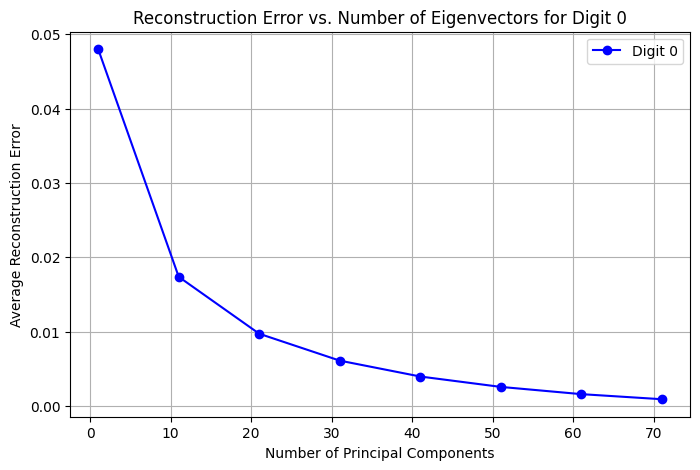

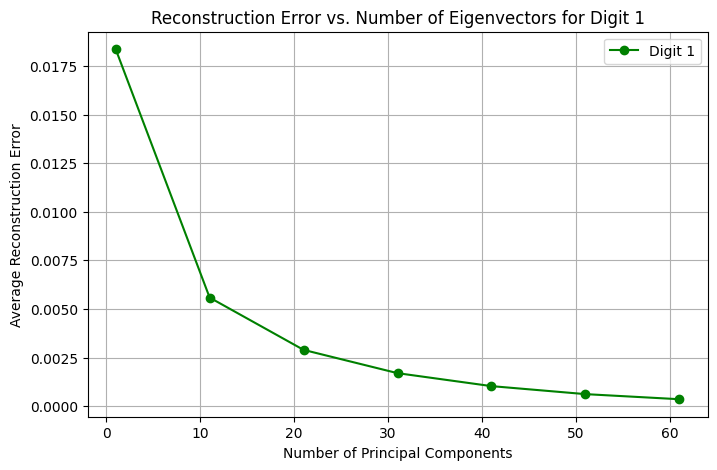

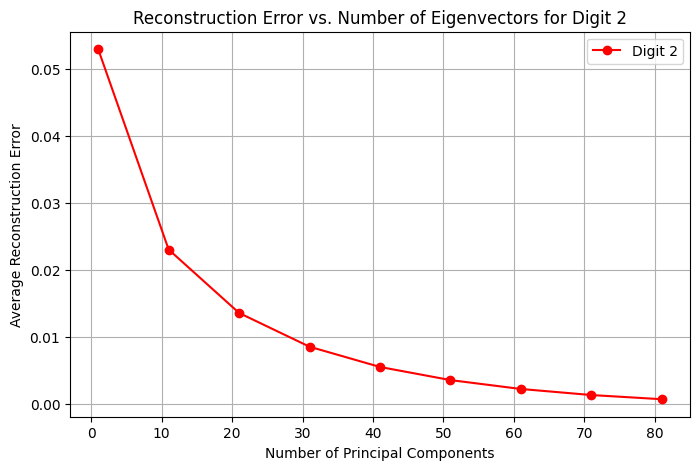

Observation: Each digit requires a different number of eigenvectors to retain 99% variance. The reconstruction error decreases as the number of eigenvectors increases, with an initially steep decline followed by a plateau. Each digit class exhibits similar trends but with variations in the rate of error reduction. Different colors are used to distinguish the digits in the plots.


In [ ]:
###############################################################################
#Author: Arif H. Zaidy                                                        #
#Date: March 10, 2025                                                         #
#Course: CPSC 5410                                                            #
#Topic: Assignment 2, Question 2                                              #
#Description:                                                                 #
#This program applies Principal Component Analysis (PCA) to a subset of the   #
#MNIST dataset containing digits 0, 1, and 2. It calculates the number of     #
#eigenvectors needed to retain 99% variance for each digit class separately.  #
#Additionally, it computes and visualizes the reconstruction error as a       #
#function of the number of principal components. The results are plotted for  #
#each digit class using different colors to highlight trends in error         #
#reduction.                                                                   #
###############################################################################

# Including Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
file_path = "https://raw.githubusercontent.com/ahzaidy/Programs/refs/heads/main/MNIST_digits0-1-2.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Extract pixel values and labels
labels = df.iloc[:, -1].to_numpy(dtype=int)  # Labels are in the last column
X = df.iloc[:, :-1].values  # Features are all columns except the last

# Verify unique labels
unique_labels = np.unique(labels)
print("Unique Labels in Dataset:", unique_labels)

# Dictionary to store the number of eigenvectors for each digit
num_components_per_digit = {}

# Define colors for different digits
colors = {0: 'blue', 1: 'green', 2: 'red'}

# Compute PCA for each digit separately
for label in unique_labels:
    X_class = X[labels == label]
    pca = PCA()
    pca.fit(X_class)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(cumulative_variance >= 0.99) + 1
    num_components_per_digit[label] = min(num_components, min(X_class.shape[0], X_class.shape[1]))
    print(f"Number of eigenvectors needed to capture 99% variance for digit {label}: {num_components_per_digit[label]}")

# Function to compute reconstruction error
def reconstruction_error(X, n_components):
    pca = PCA(n_components=n_components)
    X_transformed = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_transformed)
    return np.mean((X - X_reconstructed) ** 2)

# Compute reconstruction error for each digit class
errors = {label: [] for label in unique_labels}
components_per_digit = {label: range(1, min(num_components_per_digit[label] + 1, X.shape[1]), 10) for label in unique_labels}

for label in unique_labels:
    for n in components_per_digit[label]:
        X_class = X[labels == label]
        if X_class.shape[0] < n:
            continue  # Ensure we don't use more components than available samples
        error = reconstruction_error(X_class, n)
        errors[label].append(error)

# Plot reconstruction error for each digit separately with different colors
for label in unique_labels:
    plt.figure(figsize=(8, 5))
    plt.plot(list(components_per_digit[label])[:len(errors[label])], errors[label], marker='o', linestyle='-', color=colors[label], label=f"Digit {int(label)}")
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Average Reconstruction Error")
    plt.title(f"Reconstruction Error vs. Number of Eigenvectors for Digit {int(label)}")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.pause(1)  # Ensure each plot is displayed before moving to the next one

# Observation
observation = """Each digit requires a different number of eigenvectors to retain 99% variance. The reconstruction error decreases as the number of eigenvectors increases, with an initially steep decline followed by a plateau. Each digit class exhibits similar trends but with variations in the rate of error reduction. Different colors are used to distinguish the digits in the plots."""

print("Observation:", observation)